In [5]:
import pandas as pd

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

# Load dataset with column names
df = pd.read_csv(URL, header=None, names=col_names)

# Verify
print(df.head())

# Extract X and Y
x = df["petal_length"]
y = df["petal_width"]

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [6]:
n = len(x)

# Mean
mu_x = sum(x) / n
mu_y = sum(y) / n

# Variance
sigma_x2 = sum((xi - mu_x)**2 for xi in x) / n
sigma_y2 = sum((yi - mu_y)**2 for yi in y) / n

# Standard deviation
sigma_x = sigma_x2**0.5
sigma_y = sigma_y2**0.5

# Covariance
cov_xy = sum((x[i] - mu_x)*(y[i] - mu_y) for i in range(n)) / n

# Correlation
rho = cov_xy / (sigma_x * sigma_y)

# Display results
print("Mean X:", mu_x)
print("Mean Y:", mu_y)
print("Variance X:", sigma_x2)
print("Variance Y:", sigma_y2)
print("Covariance XY:", cov_xy)
print("Correlation XY:", rho)

Mean X: 3.758666666666666
Mean Y: 1.1986666666666668
Variance X: 3.0924248888888886
Variance Y: 0.5785315555555555
Covariance XY: 1.2877448888888892
Correlation XY: 0.9627570970509665


In [7]:
import math

def bivariate_normal_pdf(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
    # Precompute constants
    coeff = 1 / (2 * math.pi * sigma_x * sigma_y * math.sqrt(1 - rho**2))
    
    # Compute exponent
    z = ((x - mu_x)**2 / sigma_x**2) \
        - (2 * rho * (x - mu_x) * (y - mu_y) / (sigma_x * sigma_y)) \
        + ((y - mu_y)**2 / sigma_y**2)
    
    exponent = -z / (2 * (1 - rho**2))
    
    return coeff * math.exp(exponent)

pdf_values = [bivariate_normal_pdf(x[i], y[i], mu_x, mu_y, sigma_x, sigma_y, rho) for i in range(n)]


In [9]:
import numpy as np

x_range = np.linspace(min(x)-0.5, max(x)+0.5, 50)
y_range = np.linspace(min(y)-0.5, max(y)+0.5, 50)

X_grid, Y_grid = np.meshgrid(x_range, y_range)

Z_grid = np.zeros(X_grid.shape)

for i in range(X_grid.shape[0]):
    for j in range(X_grid.shape[1]):
        Z_grid[i, j] = bivariate_normal_pdf(X_grid[i, j], Y_grid[i, j], mu_x, mu_y, sigma_x, sigma_y, rho)


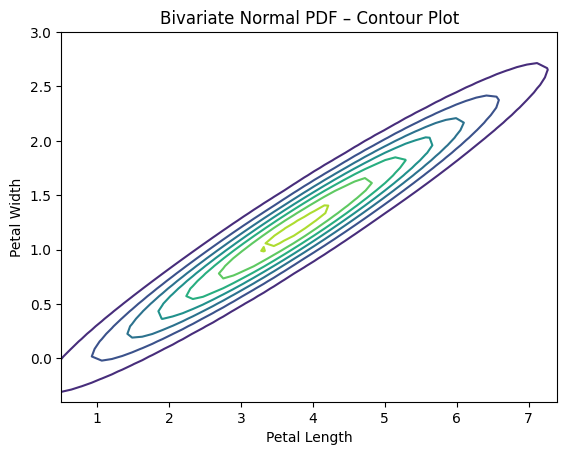

In [10]:
import matplotlib.pyplot as plt

plt.contour(X_grid, Y_grid, Z_grid)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Bivariate Normal PDF – Contour Plot")
plt.show()


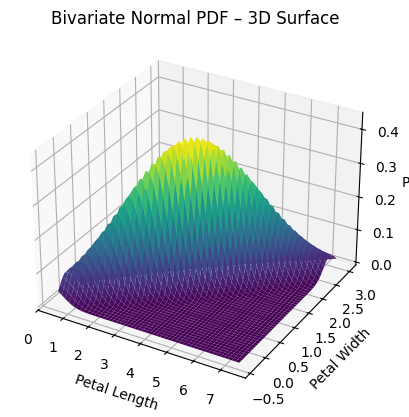

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis')
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_zlabel("PDF")
ax.set_title("Bivariate Normal PDF – 3D Surface")
plt.show()
